Loading the liberary and the dataset

In [45]:
library(dplyr)
library(data.table)
data <- read.csv("assignment.5.csv")
str(data)

'data.frame':	100 obs. of  8 variables:
 $ individual: int  1 2 3 4 5 6 7 8 9 10 ...
 $ ancestry  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ risk_score: num  -0.179 4.589 3.432 4.653 4.589 ...
 $ SNP1      : int  0 0 0 0 0 0 0 0 0 1 ...
 $ SNP2      : int  0 1 1 1 1 1 1 0 0 1 ...
 $ SNP3      : int  0 1 0 0 0 0 0 0 0 1 ...
 $ SNP4      : int  0 1 0 0 0 0 0 0 0 1 ...
 $ SNP5      : int  0 1 0 0 0 0 0 0 0 1 ...


In [46]:
summary(data)

   individual        ancestry      risk_score          SNP1           SNP2     
 Min.   :  1.00   Min.   :1.00   Min.   :-1.814   Min.   :0.00   Min.   :0.00  
 1st Qu.: 25.75   1st Qu.:1.00   1st Qu.: 1.708   1st Qu.:0.00   1st Qu.:0.00  
 Median : 50.50   Median :1.00   Median : 2.997   Median :0.00   Median :0.00  
 Mean   : 50.50   Mean   :1.42   Mean   : 2.851   Mean   :0.39   Mean   :0.49  
 3rd Qu.: 75.25   3rd Qu.:2.00   3rd Qu.: 4.208   3rd Qu.:1.00   3rd Qu.:1.00  
 Max.   :100.00   Max.   :2.00   Max.   : 6.742   Max.   :1.00   Max.   :1.00  
      SNP3          SNP4          SNP5     
 Min.   :0.0   Min.   :0.0   Min.   :0.00  
 1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0.00  
 Median :0.0   Median :0.0   Median :0.00  
 Mean   :0.4   Mean   :0.4   Mean   :0.39  
 3rd Qu.:1.0   3rd Qu.:1.0   3rd Qu.:1.00  
 Max.   :1.0   Max.   :1.0   Max.   :1.00  

Converting variables as factors

In [47]:
data$ancestry <- as.factor(data$ancestry)
data$SNP1 <- as.factor(data$SNP1)
data$SNP2 <- as.factor(data$SNP2)
data$SNP3 <- as.factor(data$SNP3)
data$SNP4 <- as.factor(data$SNP4)
data$SNP5 <- as.factor(data$SNP5)

Calculating mean and Standard deviation

In [48]:
library(data.table)
setDT(data)
summary_stats <- data[, .(mean_risk = mean(risk_score), 
                          sd_risk = sd(risk_score)), by = ancestry]
print(summary_stats)

   ancestry mean_risk  sd_risk
     <fctr>     <num>    <num>
1:        1  2.633703 1.818886
2:        2  3.151457 1.642112


Calculating the Frequencies of the SNP alleles

In [49]:
snp_frequencies <- data %>% 
  select(starts_with("SNP")) %>%
  summarise_all(~ table(.)[1])
print(snp_frequencies)

  SNP1 SNP2 SNP3 SNP4 SNP5
1   61   51   60   60   61


Performing ANOVA on all the SNPs

In [50]:
anova_snp1 <- aov(risk_score ~ SNP1 + ancestry, data = data)
summary(anova_snp1)

anova_snp2 <- aov(risk_score ~ SNP2 + ancestry, data = data)
summary(anova_snp2)

anova_snp3 <- aov(risk_score ~ SNP3 + ancestry, data = data)
summary(anova_snp3)

anova_snp4 <- aov(risk_score ~ SNP4 + ancestry, data = data)
summary(anova_snp4)

anova_snp5 <- aov(risk_score ~ SNP5 + ancestry, data = data)
summary(anova_snp5)

            Df Sum Sq Mean Sq F value Pr(>F)
SNP1         1   5.33   5.329   1.728  0.192
ancestry     1   1.27   1.275   0.414  0.522
Residuals   97 299.06   3.083               

            Df Sum Sq Mean Sq F value   Pr(>F)    
SNP2         1 104.67  104.67  55.086 4.44e-11 ***
ancestry     1  16.67   16.67   8.774  0.00384 ** 
Residuals   97 184.32    1.90                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value Pr(>F)
SNP3         1   5.78   5.784   1.876  0.174
ancestry     1   0.77   0.774   0.251  0.617
Residuals   97 299.11   3.084               

            Df Sum Sq Mean Sq F value Pr(>F)  
SNP4         1   2.43   2.431   0.816 0.3686  
ancestry     1  14.14  14.138   4.744 0.0318 *
Residuals   97 289.09   2.980                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value  Pr(>F)   
SNP5         1   0.91   0.910   0.314 0.57670   
ancestry     1  23.51  23.512   8.109 0.00538 **
Residuals   97 281.24   2.899                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Bonferronni Analysis

In [51]:
p_values <- c(
  summary(anova_snp1)[[1]]["Pr(>F)"][1, 1],
  summary(anova_snp2)[[1]]["Pr(>F)"][1, 1],
  summary(anova_snp3)[[1]]["Pr(>F)"][1, 1],
  summary(anova_snp4)[[1]]["Pr(>F)"][1, 1],
  summary(anova_snp5)[[1]]["Pr(>F)"][1, 1]
)
p_adj <- p.adjust(p_values, method = "bonferroni")
names(p_adj) <- c("SNP1", "SNP2", "SNP3", "SNP4", "SNP5")
print(p_adj)

        SNP1         SNP2         SNP3         SNP4         SNP5 
9.586062e-01 2.221006e-10 8.699611e-01 1.000000e+00 1.000000e+00 


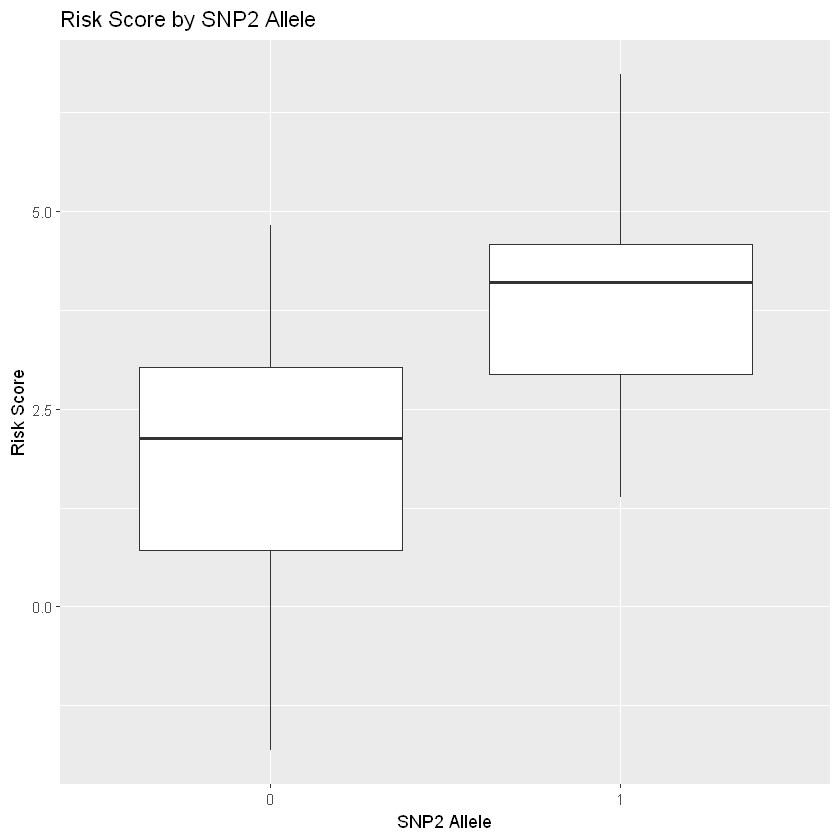

In [52]:
library(ggplot2)
ggplot(data, aes(x = SNP2, y = risk_score)) + geom_boxplot() + 
labs(title = "Risk Score by SNP2 Allele", x = "SNP2 Allele", y = "Risk Score")

Linear Regresssion Analysis

In [53]:
snp2 <- lm(risk_score ~ SNP2 + ancestry, data = data)
summary(snp2)


Call:
lm(formula = risk_score ~ SNP2 + ancestry, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2526 -1.0368  0.0683  0.9672  3.3836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4384     0.2375   6.057 2.64e-08 ***
SNP21         2.1664     0.2787   7.773 8.11e-12 ***
ancestry2     0.8361     0.2823   2.962  0.00384 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.378 on 97 degrees of freedom
Multiple R-squared:  0.397,	Adjusted R-squared:  0.3846 
F-statistic: 31.93 on 2 and 97 DF,  p-value: 2.216e-11
